In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

This activity is intended to introduce you to colab notebooks in the contextp of Signals and Systems. We'll be using colab extensively this semester.

The first library is `sympy` which is used for symbolic manipulation. You can define symbols like this:

In [2]:
t,R,C,L = sp.symbols("t,R,C,L", positive=True, real=True)
Va,Vb,Vc = sp.symbols("Va,Vb,Vc", real=True)
s = sp.symbols("s")

Then you can define expressions based on those symbols.

Suppose we have a circuit like this:

![Simple LRC](https://github.com/RBASOE-Class-Projects/EENG-310-Notebooks/blob/main/images/simpleLRC.png?raw=true)

We can define $v_a$, $v_b$, and $v_c$ as shown.

Suppose the input voltage has a laplace transform of $V_1(s)$. Then we have $v_a(s) = V_1(s)$.

We can write expressions for $v_b$ and $v_c$ in terms of $v_a$, $L$, $R$, and $C$.

In [10]:
Zl = s*L
Zc = 1/(C*s)
f1 = (Vb-Va)/Zl + (Vb-Vc)/Zc
f2 = (Vc-Vb)/Zc + Vc/R
solns=sp.solve((f1,f2),(Vb,Vc))
solns

{Vb: (C*R*s + 1)/(C*L*s**3 + C*R*s**2 + s), Vc: C*R/(C*L*s**2 + C*R*s + 1)}

In [12]:
solns[Vc]/R

C/(C*L*s**2 + C*R*s + 1)

In [14]:
Va = 1/s
I = Va/(L*s + 1/(C*s) + R)
I

1/(s*(L*s + R + 1/(C*s)))

In [15]:
sp.apart(sp.simplify(I),s)

C/(C*L*s**2 + C*R*s + 1)

In [6]:
i = sp.inverse_laplace_transform(I,s,t)
i

2*sqrt(C)*exp(-R*t/(2*L))*sin(t*sqrt(-C*R**2 + 4*L)/(2*sqrt(C)*L))/sqrt(-C*R**2 + 4*L)

In [7]:
isub = i.subs({R:100, L:50e-3, C:1e-6})
isub


0.00458831467741124*exp(-1000.0*t)*sin(4358.89894354067*t)

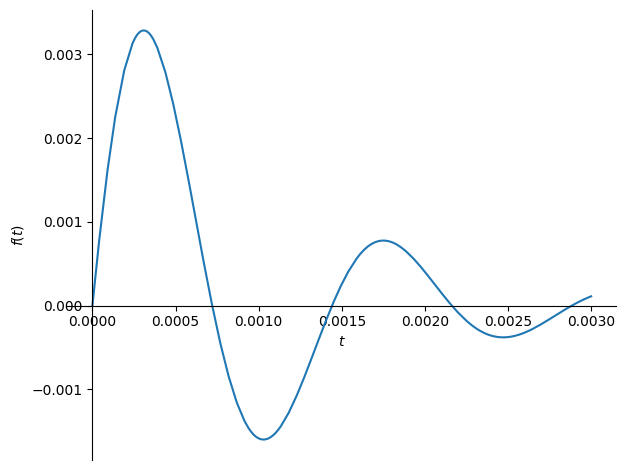

In [8]:
sp.plot(isub,(t,0,0.003))